March 26th, 2025

## Reduced QLT hot + cold electron whistler anisotropy instability


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from QLT_equations.rQLT import dydt
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Ensemble

In [3]:
delta_vec = np.array([1])
A_h_vec = 10**np.linspace(-0.5, 1, 10)
beta_vec = 10**np.linspace(-1, 1, 11)

In [4]:
params = np.zeros((len(delta_vec)*len(A_h_vec)*len(beta_vec), 3))
pp = 0 
for ii, delta in enumerate(delta_vec):
    for jj, A in enumerate(A_h_vec):
        for kk, beta in enumerate(beta_vec):
            params[pp, 0] = delta
            params[pp, 1] = A
            params[pp, 2] = beta
            pp+=1

In [5]:
np.save("data/ensemble_QLT/params.npy", params)

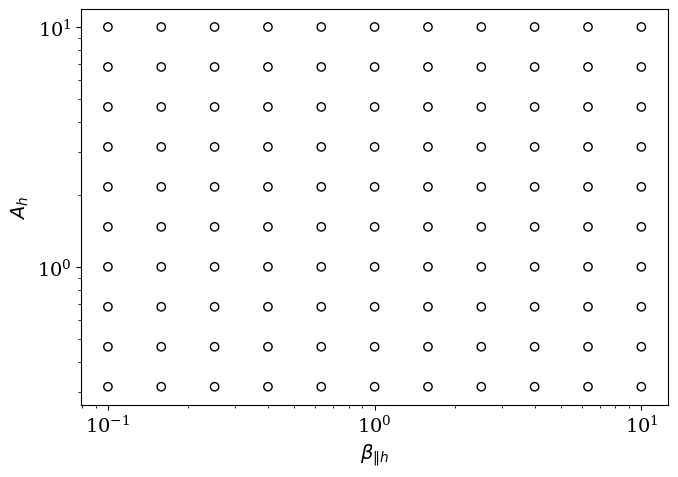

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(params[:, 2]/params[:, 0], params[:, 1], marker="o", facecolors='none', edgecolors='k')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")
plt.tight_layout()

In [7]:
# things that do not change between ensembles
t_max = 800
# isotropic cold electrons
A_c_init = 0. 
# initial dB
q_vec = np.linspace(0.1, 1.2, 80) # vector with all normalized wavenumber
dB_init = 1e-5 * np.ones(len(q_vec)) # initial wave energy density noise level

In [ ]:
for ii in range(params.shape[0]):
    print("ensemble #" + str(ii))
    # hot electrons ration 
    delta = params[ii, 0] # ratio of hot electron population
    beta_par_h_init = params[ii, 2]/delta # initial beta parallel 
    A_h_init = params[ii, 1] # initial anisotropic level
    
    if delta != 1:
        # cold electrons
        beta_par_c_init = beta_par_h_init/100/(1-delta)# initial beta parallel 
        # ions 
        beta_par_i_init = beta_par_c_init*(1-delta)
        # 
        include_cold = True
    else:
        beta_par_c_init = 0
        beta_par_i_init = beta_par_h_init/100
        include_cold = False

    # perpendicular beta for plotting 
    beta_perp_c_init =  (A_c_init + 1) * beta_par_c_init  # initial beta perpendicular 
    beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 

    # simulate 
    result = scipy.integrate.solve_ivp(fun=dydt, 
                                   t_span=[0, t_max], 
                                   y0=np.concatenate(([beta_perp_c_init], [beta_par_c_init], [beta_perp_h_init], [beta_par_h_init], dB_init)), 
                                   args=(q_vec, delta, beta_par_i_init, include_cold),
                                   atol=1e-9, rtol=1e-9, method='BDF')

    # save simulation
    np.save("data/ensemble_QLT/t_" + str(ii) + ".npy", result.t)
    np.save("data/ensemble_QLT/y_" + str(ii) + ".npy", result.y)

ensemble #0
ensemble #1
ensemble #2
ensemble #3
ensemble #4
ensemble #5
ensemble #6


/Users/oissan/PycharmProjects/QLT_whistler/QLT_equations/rQLT.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(xi)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)


ensemble #7
